### Questions

### Objectives
YWBAT 
* apply best practices for hypothesis testing on data

### Outline

In [38]:
import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [24]:
# How do I setup a hypothesis test? 
 
pop1 = np.random.normal(loc=np.random.randint(5, 8), scale=np.random.randint(2, 3), size=300)
pop2 = np.random.normal(loc=np.random.randint(5, 8), scale=np.random.randint(2, 3), size=300)
pop3 = np.random.normal(loc=np.random.randint(5, 10), scale=np.random.randint(5, 8), size=300)

### Workflow
* **State A Question - Not the Same as a Hypothesis**
    * Do discounts have a statistically significant on the amount of products purchased
* **Split up your populations**
    * Scenario A: Split up population by discount amount
    * Scenario B: Split up discount vs no discount
    * Scenario C: Split up discounts under 10%, discounts = 15%, discounts over 15%
* **Form your hypothesis**
    * Scenario A:
        * H0: $\mu_1 = \mu_2 = ... = \mu_k$
        * HA: $\mu_1 \neq \mu_2 \neq \mu_3 ... \neq \mu_k$l
    * Scenario B:
        * H0: $\mu_1 = \mu_2$ 
        * HA: $\mu_1 \neq \mu_2$
    * Scenario C:
        * H0: $\mu_1 = \mu_2 = ... = \mu_k$
        * HA: $\mu_1 \neq \mu_2 \neq \mu_3 ... \neq \mu_k$
* **Investigate/EDA**
* **Determine which Test to Use**
    * A good sample size is around 30
    * Test Normality: **Shapiro Test**
    * Test Equal Variance: 
        * 2 populations **Levene Test**
        * 2+ populations **Bartlett Test**
        
    * Scenario A:
        * ANOVA
            * check for normality
            * check for equal variances
            * Anova just says 1 thing is different
        * Tukey
            * Pairwise comparisons
    * Scenario B:
        * 2samplettest
            * Welch's
                * nonequal variance
                * normally distributed population
                * Use when sample size isn't the same
            * Not Welch's
                * equal variance
                * normally distributed population
                * sample sizes have to be similar
            * 2 tailed
    * Scenario C:
        * ANOVA
            * check for normality
            * check for equal variances 
            * Anova just says 1 thing is different
        * Tukey
            * Pairwise comparisons
* **Run Your Test**
* **Interpret Results**
* **Business Recommendations**
* **Possibly investigate further, if not suggest further work**

In [32]:
# Run Shapiro Test (Test for Normality on our pops)
for pop in [pop1, pop2, pop3]:
    w, p = scs.shapiro(pop)
    print("p = {}".format(p))

p = 0.814402163028717
p = 0.8968263268470764
p = 0.7062969207763672


In [42]:
arr = [[p, 1] for p in pop1]
arr.extend([[p, 2] for p in pop2])
arr.extend([[p, 3] for p in pop2])

In [47]:
arr = np.array(arr)
df = pd.DataFrame(data=arr, columns=['num', 'group'])
df["group"] = df["group"].astype(int)
df.head()

,num,group
0,5.037819,1
1,3.336897,1
2,1.837631,1
3,8.614991,1
4,3.200012,1


In [48]:
sm.stats.multicomp.pairwise_tukeyhsd(df, groups='group')

ValueError: data has 900 elements and groups has 5

# Does population have an effect on the mean?

# Step 0: Investigate

In [17]:
def make_dist(arr, bins=20, color='r', alpha=0.8):
    plt.figure(figsize=(8, 5))
    plt.grid(zorder=0)
    plt.hist(arr, bins=bins, color=color, alpha=alpha, zorder=2)
    plt.show()

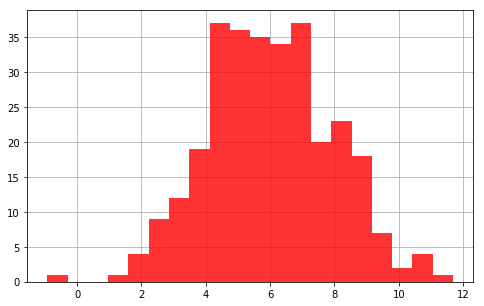

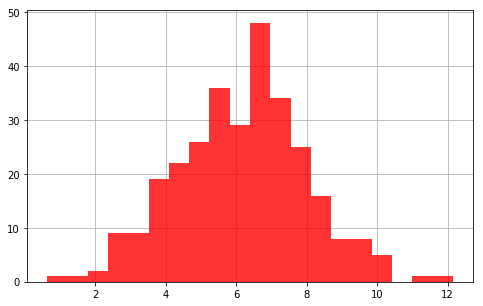

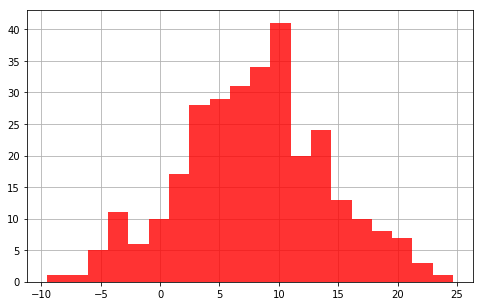

In [27]:
make_dist(pop1)
make_dist(pop2)
make_dist(pop3)

In [19]:
pop1.mean(), pop2.mean()

(6.7822610289145535, 5.921375992970874)

# Step 1: State Hypothesis

**In the project, an example would be, 

H0: $\mu_1 = \mu_2$

HA: 

### Assessment